In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import pandas_profiling

In [3]:
df = pd.read_csv('tmp.csv')
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran’s admin,veterans benefits,weeks worked in year,year,salary
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
df = df.replace(' Not in universe', np.nan)
df = df.replace(' ?', np.nan)
df = df.replace(' Not in universe or children', np.nan)

In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,42
Number of observations,199523
Total Missing (%),24.8%
Total size in memory,63.9 MiB
Average record size in memory,336.0 B
Numeric,12
Categorical,29
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [6]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns, len(numeric_features.columns)

(Index(['age', 'detailed industry recode', 'detailed occupation recode',
        'wage per hour', 'capital gains', 'capital losses',
        'dividends from stocks', 'instance weight',
        'num persons worked for employer', 'own business or self employed',
        'veterans benefits', 'weeks worked in year', 'year'],
       dtype='object'), 13)

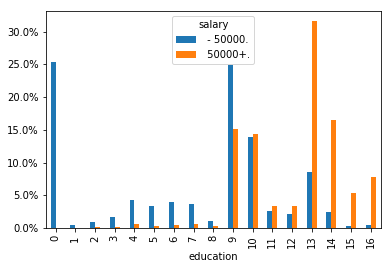

In [6]:
education_mapping = {" Children": 0,
                     " Less than 1st grade": 1,
                     " 1st 2nd 3rd or 4th grade": 2,
                     " 5th or 6th grade": 3,
                     " 7th and 8th grade": 4,
                     " 9th grade": 5,
                     " 10th grade": 6,
                     " 11th grade": 7,
                     " 12th grade no diploma": 8,
                     " High school graduate": 9,
                     " Some college but no degree": 10,
                     " Associates degree-occup /vocational": 11,
                     " Associates degree-academic program": 12,
                     " Bachelors degree(BA AB BS)": 13,
                     " Masters degree(MA MS MEng MEd MSW MBA)": 14,
                     " Doctorate degree(PhD EdD)": 15,
                     " Prof school degree (MD DDS DVM LLB JD)": 16}

df = df.replace(education_mapping)
df['education'] = df['education'].astype('category')

import matplotlib.ticker as mtick
gr = df.groupby(["salary","education"]).size() 
ax = (gr / gr.groupby(level=0).sum()*100).unstack("salary").plot(kind="bar",fontsize=10) # w procentach
#ax =  df.groupby(["salary","education"]).size().unstack("salary").plot(kind="bar",fontsize=10) # normalnie
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# do podpisania każdego słupka jak w płci
#for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
#    ax.text(i.get_x()+0.01, i.get_height()+7, \
#            str(round((i.get_height()), 2)), fontsize=13, color='black',
#                rotation=30)

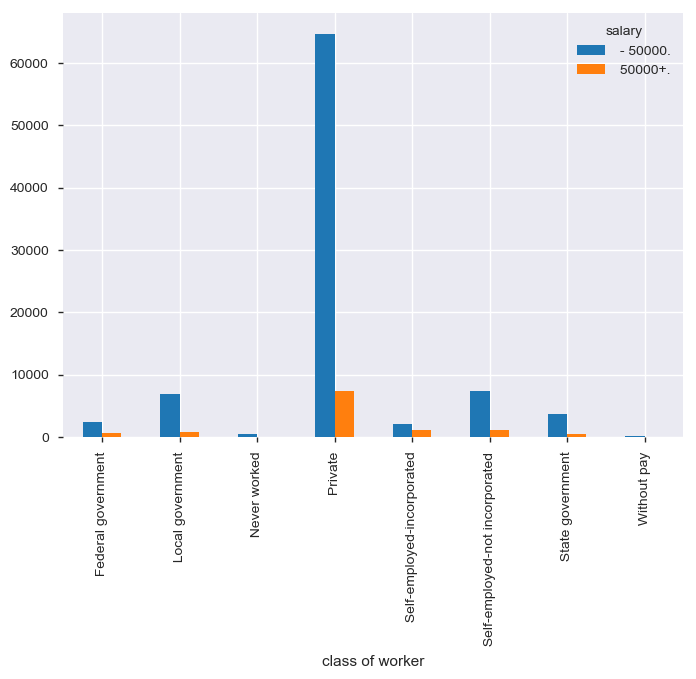

In [5]:
df.groupby(["salary","class of worker"]).size().unstack("salary").plot(kind="bar",fontsize=10)

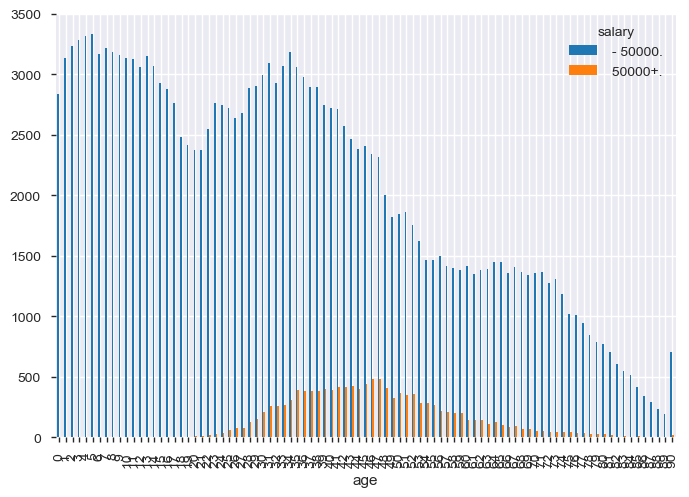

In [6]:
df.groupby(["salary","age"]).size().unstack("salary").plot(kind="bar",fontsize=10)

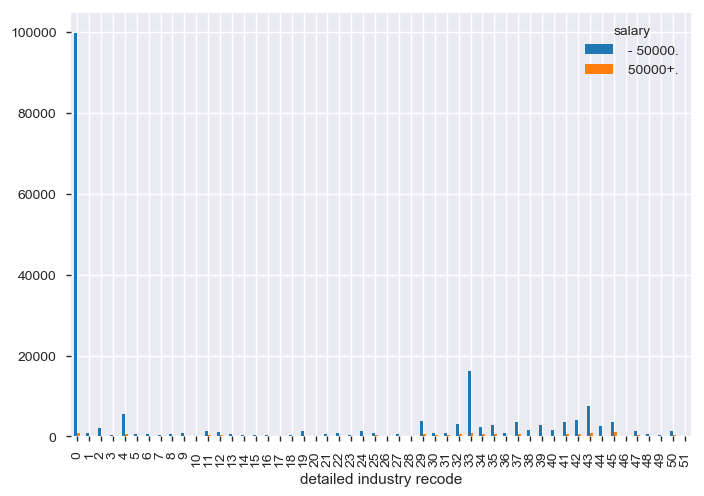

In [7]:
df.groupby(["salary","detailed industry recode"]).size().unstack("salary").plot(kind="bar",fontsize=10)

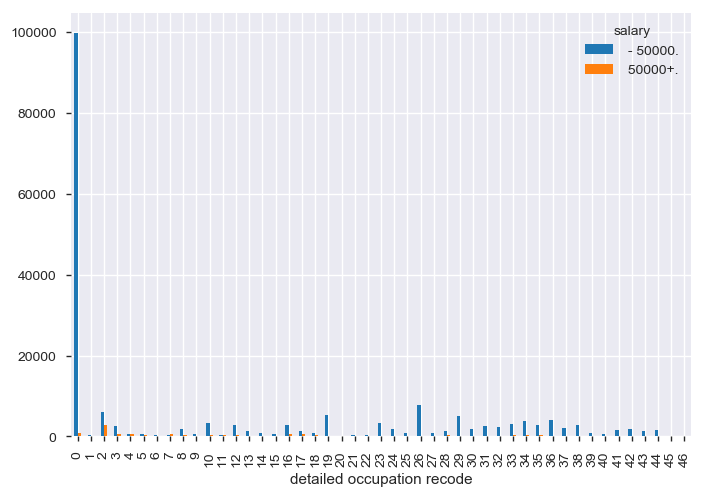

In [8]:
df.groupby(["salary","detailed occupation recode"]).size().unstack("salary").plot(kind="bar",fontsize=10)

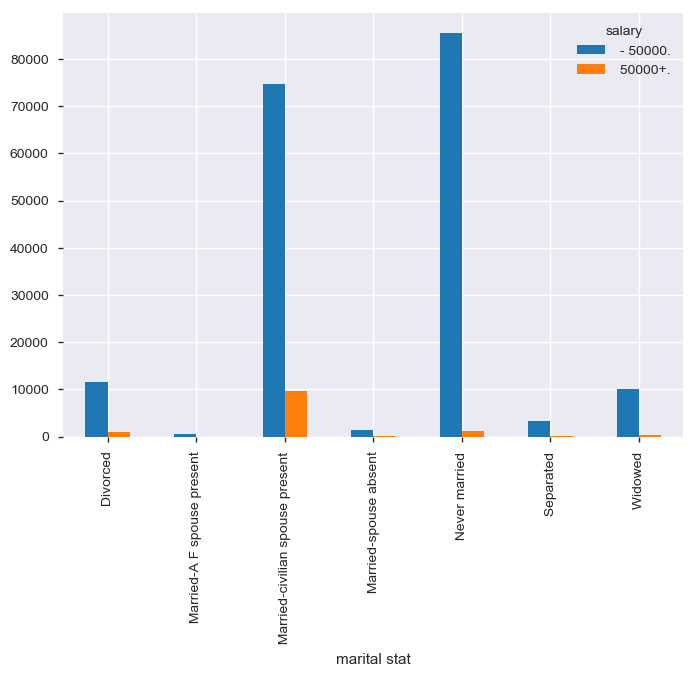

In [9]:
df.groupby(["salary","marital stat"]).size().unstack("salary").plot(kind="bar",fontsize=10)

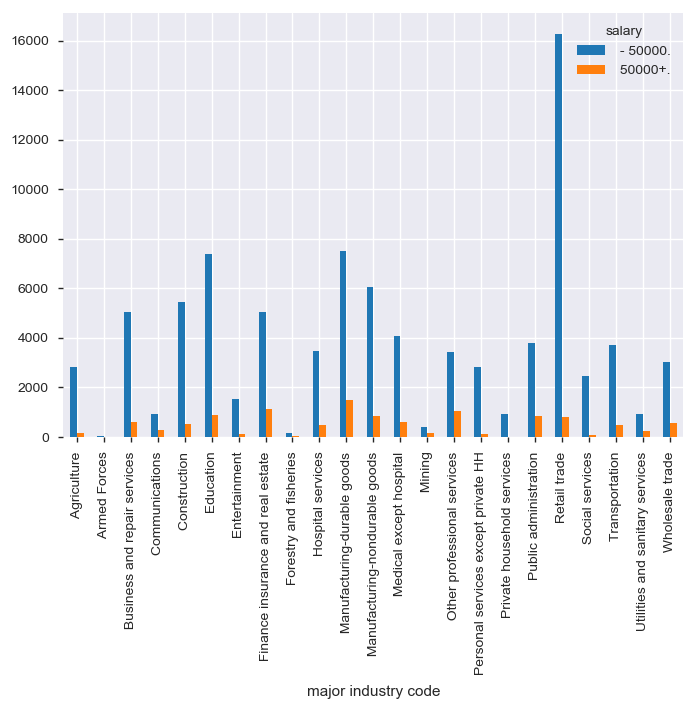

In [10]:
gr = df.groupby(["salary","major industry code"]).size()
df.groupby(["salary","major industry code"]).size().unstack("salary").plot(kind="bar",fontsize=10)

(gr / gr.groupby(level=0).sum())

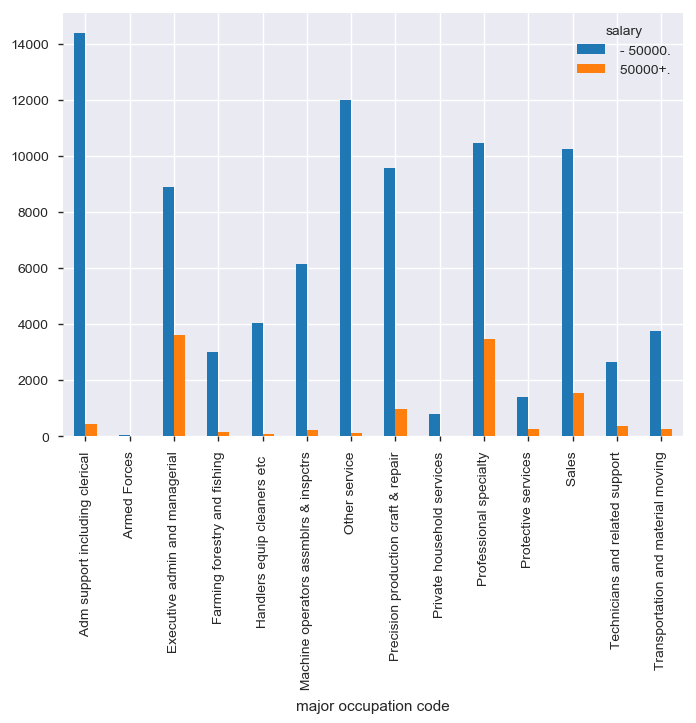

In [11]:
df.groupby(["salary","major occupation code"]).size().unstack("salary").plot(kind="bar",fontsize=10)

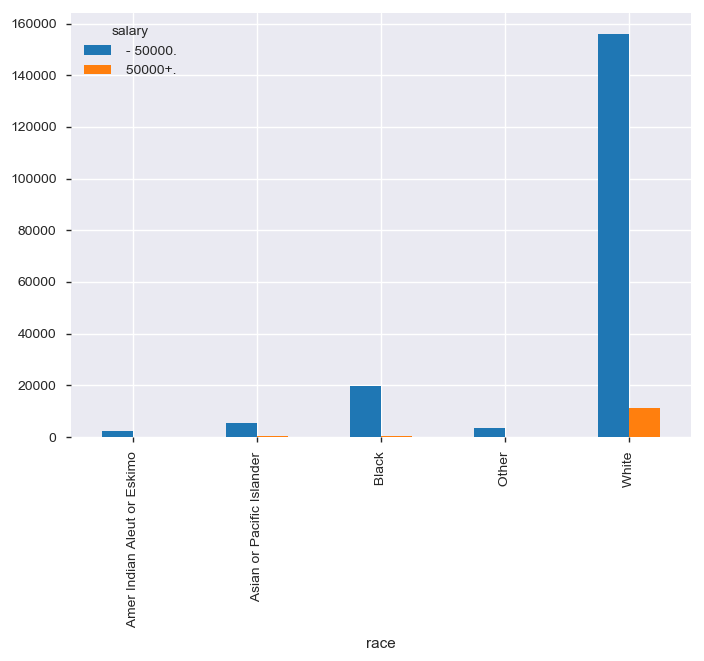

In [12]:
df.groupby(["salary","race"]).size().unstack("salary").plot(kind="bar",fontsize=10)

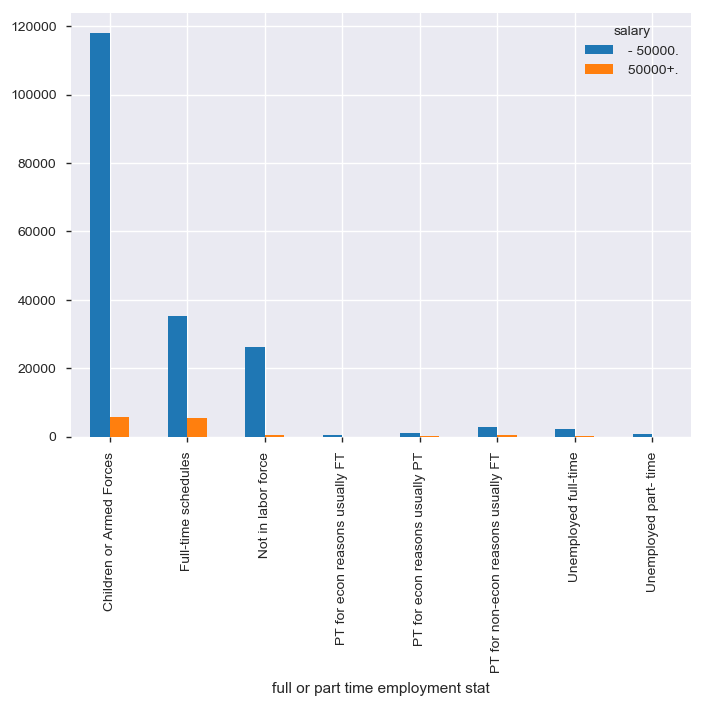

In [14]:
df.groupby(["salary","full or part time employment stat"]).size().unstack("salary").plot(kind="bar",fontsize=10)

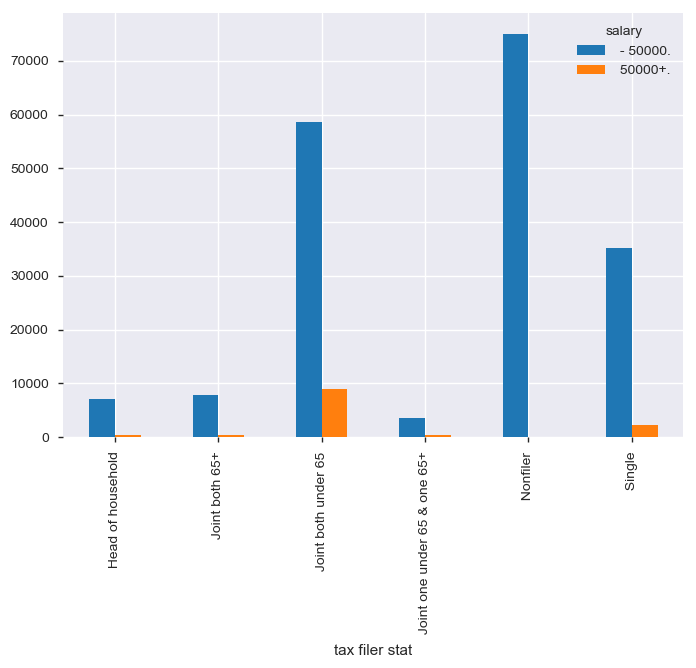

In [15]:
df.groupby(["salary","tax filer stat"]).size().unstack("salary").plot(kind="bar",fontsize=10)

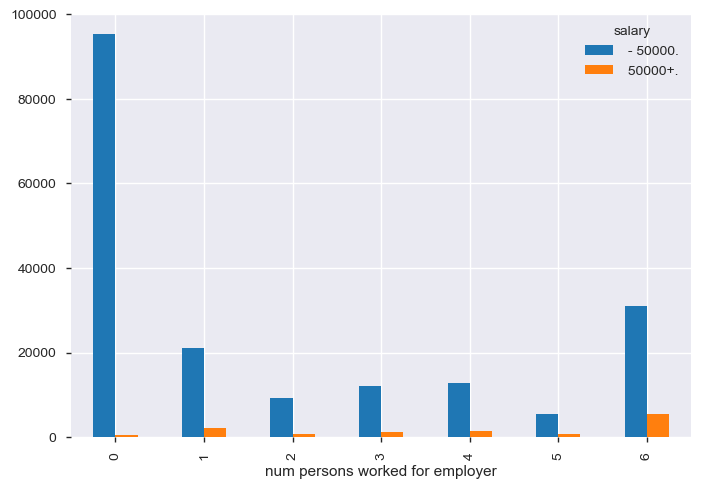

In [16]:
df.groupby(["salary","num persons worked for employer"]).size().unstack("salary").plot(kind="bar",fontsize=10)

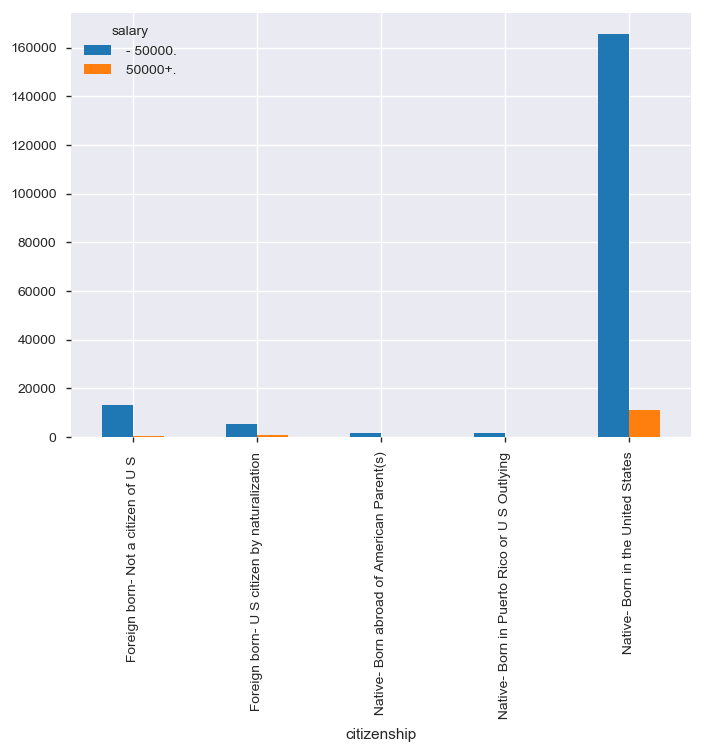

In [17]:
df.groupby(["salary","citizenship"]).size().unstack("salary").plot(kind="bar",fontsize=10)

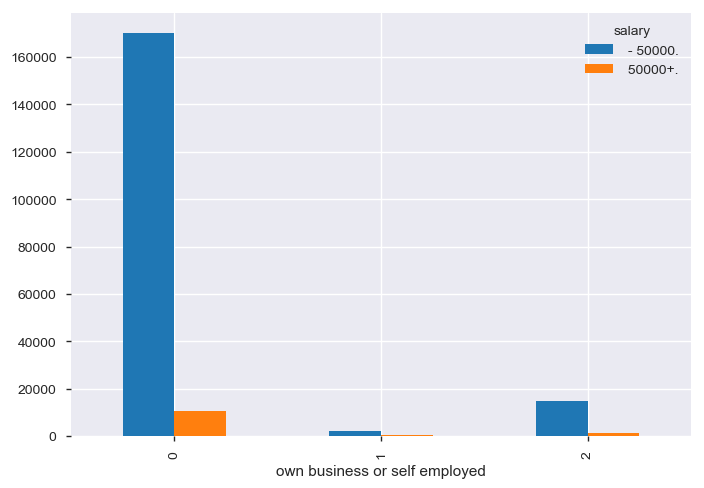

In [18]:
df.groupby(["salary","own business or self employed"]).size().unstack("salary").plot(kind="bar",fontsize=10)

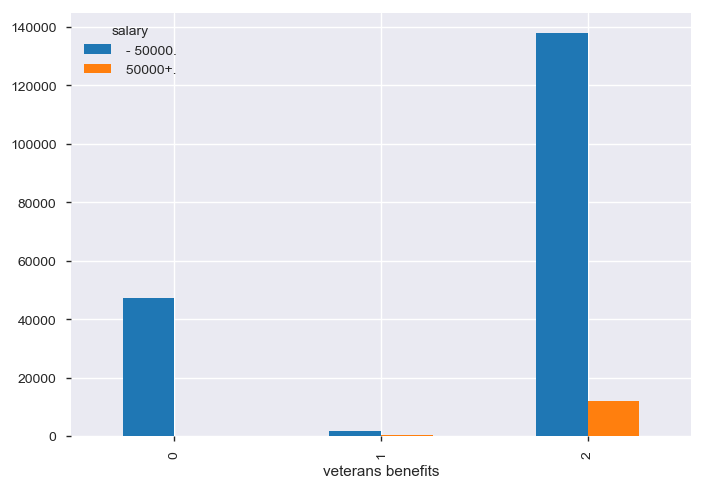

In [19]:
df.groupby(["salary","veterans benefits"]).size().unstack("salary").plot(kind="bar",fontsize=10)

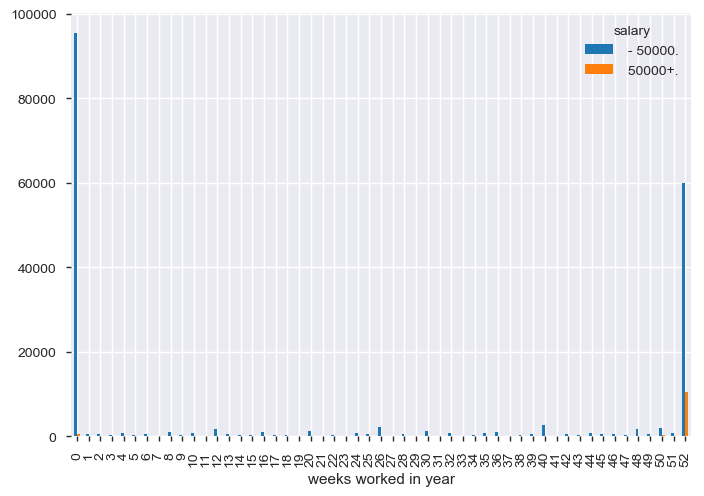

In [20]:
df.groupby(["salary","weeks worked in year"]).size().unstack("salary").plot(kind="bar",fontsize=10)